In [69]:
import numpy as np
import sys
sys.path.insert(0, '../') 
from RNN_model_GRAD import *
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
try:
    import ujson as json
except ImportError:
    import json
import scipy.linalg as slin
from mpl_toolkits.mplot3d import Axes3D
import networkx as nx
import matplotlib.colors as colors
import matplotlib.cm as cm
import matplotlib as mpl
from numba import jit, njit
import scipy
from dca.dca import DynamicalComponentsAnalysis as DCA
from sklearn.linear_model import Ridge as RR
from sklearn.metrics import r2_score
from scipy.linalg import subspace_angles
from sklearn.decomposition import PCA

# Loading Trained Networks

Loading the 10 weight matrices for each task

## Perception Task

In [70]:
weight_histories_perception = []
num_networks=10
for i in range(num_networks):
    print(i)
    with open('Perception_Task/relu/256_nodes/weight_history_{0}.json'.format(i)) as f:
        weight_history = json.load(f)
    weight_histories_perception.append(weight_history)

0
1
2
3
4
5
6
7
8
9


**Defining the 10 perception networks**

In [71]:
num_nodes = 256
time_constant = 100 #ms
timestep = 10 #ms
noise_strength = 0.01
input_weights_perception = []
perception_networks = []
for i in range(num_networks):
    weight_history = weight_histories_perception[i]
    noise_weights = np.array(weight_history['noise weights'])
    bias_weights = np.array(weight_history['bias'])
    input_weights = np.array(weight_history['input weights'])
    output_weight_matrix = np.array(weight_history['output weights'])
    connectivity_matrix = np.array(weight_history['connectivity matrix'])
    final_weights = np.array(weight_history['trained weights'][-1])


    weight_matrix = tf.Variable(final_weights)
    connectivity_matrix = tf.constant(connectivity_matrix)

    input_weight_matrix = tf.constant(np.vstack((bias_weights, noise_weights, input_weights)))   
    input_weights_perception.append(input_weight_matrix)
    init_activations = tf.constant(np.zeros((num_nodes, 1)))
    output_weight_matrix = tf.constant(output_weight_matrix)

    network = RNN(weight_matrix, connectivity_matrix, init_activations, output_weight_matrix, time_constant = time_constant,
                 timestep = timestep,activation_func = keras.activations.relu, output_nonlinearity = lambda x : x)
    perception_networks.append(network)

**Defining the 10 untrained Perception Networks**

In [72]:
num_nodes = 256
time_constant = 100 #ms
timestep = 10 #ms
noise_strength = 0.01
input_weights_perception = []
perception_networks_untrained = []
for i in range(num_networks):
    weight_history = weight_histories_perception[i]
    noise_weights = np.array(weight_history['noise weights'])
    bias_weights = np.array(weight_history['bias'])
    input_weights = np.array(weight_history['input weights'])
    output_weight_matrix = np.array(weight_history['output weights'])
    connectivity_matrix = np.array(weight_history['connectivity matrix'])
    final_weights = np.array(weight_history['trained weights'][0])


    weight_matrix = tf.Variable(final_weights)
    connectivity_matrix = tf.constant(connectivity_matrix)

    input_weight_matrix = tf.constant(np.vstack((bias_weights, noise_weights, input_weights)))   
    input_weights_perception.append(input_weight_matrix)
    init_activations = tf.constant(np.zeros((num_nodes, 1)))
    output_weight_matrix = tf.constant(output_weight_matrix)

    network = RNN(weight_matrix, connectivity_matrix, init_activations, output_weight_matrix, time_constant = time_constant,
                 timestep = timestep,activation_func = keras.activations.relu, output_nonlinearity = lambda x : x)
    perception_networks_untrained.append(network)

## Decision Task

In [73]:
weight_histories_decision = []
for i in range(num_networks):
    print(i)
    with open('Decision_Task/relu/256_nodes/weight_history_{0}.json'.format(i)) as f:
        weight_history = json.load(f)
    weight_histories_decision.append(weight_history)

0
1
2
3
4
5
6
7
8
9


**Defining the 10 decision networks**

In [74]:
num_nodes = 256
time_constant = 100 #ms
timestep = 10 #ms
noise_strength = 0.01
input_weights_decision = []
decision_networks = []
for i in range(num_networks):
    weight_history = weight_histories_decision[i]
    noise_weights = np.array(weight_history['noise weights'])
    bias_weights = np.array(weight_history['bias'])
    input1_weights = np.array(weight_history['input1 weights'])
    input2_weights = np.array(weight_history['input2 weights'])
    output_weight_matrix = np.array(weight_history['output weights'])
    connectivity_matrix = np.array(weight_history['connectivity matrix'])
    final_weights = np.array(weight_history['trained weights'][-1])


    weight_matrix = tf.Variable(final_weights)
    connectivity_matrix = tf.constant(connectivity_matrix)

    input_weight_matrix = tf.constant(np.vstack((bias_weights, noise_weights, input1_weights, input2_weights)))   
    input_weights_decision.append(input_weight_matrix)
    init_activations = tf.constant(np.zeros((num_nodes, 1)))
    output_weight_matrix = tf.constant(output_weight_matrix)

    network = RNN(weight_matrix, connectivity_matrix, init_activations, output_weight_matrix, time_constant = time_constant,
                 timestep = timestep,activation_func = keras.activations.relu, output_nonlinearity = lambda x : x)
    decision_networks.append(network)

**Defining the 10 untrained Decision Networks**

In [75]:
num_nodes = 256
time_constant = 100 #ms
timestep = 10 #ms
noise_strength = 0.01
input_weights_decision = []
decision_networks_untrained = []
for i in range(num_networks):
    weight_history = weight_histories_decision[i]
    noise_weights = np.array(weight_history['noise weights'])
    bias_weights = np.array(weight_history['bias'])
    input1_weights = np.array(weight_history['input1 weights'])
    input2_weights = np.array(weight_history['input2 weights'])
    output_weight_matrix = np.array(weight_history['output weights'])
    connectivity_matrix = np.array(weight_history['connectivity matrix'])
    final_weights = np.array(weight_history['trained weights'][0])


    weight_matrix = tf.Variable(final_weights)
    connectivity_matrix = tf.constant(connectivity_matrix)

    input_weight_matrix = tf.constant(np.vstack((bias_weights, noise_weights, input1_weights, input2_weights)))   
    input_weights_decision.append(input_weight_matrix)
    init_activations = tf.constant(np.zeros((num_nodes, 1)))
    output_weight_matrix = tf.constant(output_weight_matrix)

    network = RNN(weight_matrix, connectivity_matrix, init_activations, output_weight_matrix, time_constant = time_constant,
                 timestep = timestep,activation_func = keras.activations.relu, output_nonlinearity = lambda x : x)
    decision_networks_untrained.append(network)

# Plotting PI Curves

## Perception Task

### Untrained Network, Input=.5

**Simulating Dynamics**

In [34]:
time=10000

def rule_input(time):
    return .5 + np.random.normal(0, .05)
def bias(time):
    return 1
def noise(time):
    return np.sqrt(2 * time_constant/timestep) * noise_strength * np.random.normal(0, 1)
untrained_perception_activations = []
for i, network in enumerate(perception_networks_untrained):
    network.reset_activations()
    input_funcs = [bias, noise, rule_input]
    inputs = network.convert(time, input_funcs)
    outputs, activations = network.simulate(time, inputs, input_weights_perception[i])
    activations = [activation.numpy() for activation in activations]
    activations = np.asarray(activations)
    untrained_perception_activations.append(activations)

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 474.63it/s]


**Running DCA**

In [35]:
max_dim = 8
ds = np.arange(1, max_dim+1)

In [36]:
pis_untrained_perception_low_inp=[]
for activations in untrained_perception_activations:
    X = activations
    pi = np.zeros(ds.size) #Predictive Information
    dca_scores = np.zeros(ds.size)
    dca_model = DCA(T=10, d=256)
    dca_model.estimate_data_statistics(X) # only need to estimate this once
    for ii, d in tqdm(enumerate(ds)):
        dca_model.fit_projection(d=d)
        pi[ii] = dca_model.score()
    pis_untrained_perception_low_inp.append(pi)

8it [02:29, 18.72s/it]
8it [02:49, 21.16s/it]
8it [02:00, 15.08s/it]
8it [02:04, 15.58s/it]
8it [02:34, 19.28s/it]
8it [03:19, 24.96s/it]
8it [02:37, 19.68s/it]
8it [01:11,  8.92s/it]
8it [01:36, 12.12s/it]
8it [01:27, 10.91s/it]


**Plotting PI Curve**

<ErrorbarContainer object of 3 artists>

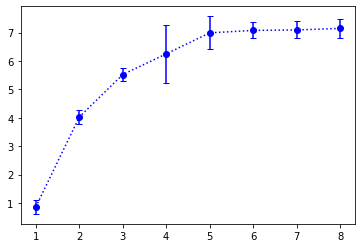

In [37]:
mean_pi = np.mean(pis_untrained_perception_low_inp,axis=0)
std_pi = np.std(pis_untrained_perception_low_inp,axis=0)

plt.errorbar(ds, mean_pi, yerr=std_pi, capsize=3,fmt='bo:')

### Untrained Network, Input=.8

**Simulating Dynamics**

In [38]:
time=10000

def rule_input(time):
    return .8 + np.random.normal(0, .05)
def bias(time):
    return 1
def noise(time):
    return np.sqrt(2 * time_constant/timestep) * noise_strength * np.random.normal(0, 1)
untrained_perception_activations = []
for i, network in enumerate(perception_networks_untrained):
    network.reset_activations()
    input_funcs = [bias, noise, rule_input]
    inputs = network.convert(time, input_funcs)
    outputs, activations = network.simulate(time, inputs, input_weights_perception[i])
    activations = [activation.numpy() for activation in activations]
    activations = np.asarray(activations)
    untrained_perception_activations.append(activations)

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 735.63it/s]


**Running DCA**

In [39]:
max_dim = 8
ds = np.arange(1, max_dim+1)

In [40]:
pis_untrained_perception_high_inp=[]
for activations in untrained_perception_activations:
    X = activations
    pi = np.zeros(ds.size) #Predictive Information
    dca_scores = np.zeros(ds.size)
    dca_model = DCA(T=10, d=256)
    dca_model.estimate_data_statistics(X) # only need to estimate this once
    for ii, d in tqdm(enumerate(ds)):
        dca_model.fit_projection(d=d)
        pi[ii] = dca_model.score()
    pis_untrained_perception_high_inp.append(pi)

8it [01:32, 11.58s/it]
8it [01:51, 13.93s/it]
8it [01:21, 10.17s/it]
8it [01:34, 11.84s/it]
8it [01:31, 11.46s/it]
8it [01:54, 14.30s/it]
8it [01:47, 13.39s/it]
8it [01:23, 10.44s/it]
8it [02:17, 17.23s/it]
8it [01:20, 10.08s/it]


**Plotting PI Curve**

<ErrorbarContainer object of 3 artists>

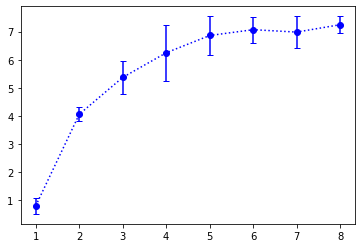

In [41]:
mean_pi = np.mean(pis_untrained_perception_high_inp,axis=0)
std_pi = np.std(pis_untrained_perception_high_inp,axis=0)

plt.errorbar(ds, mean_pi, yerr=std_pi, capsize=3,fmt='bo:')

### Input=.5

**Simulating Dynamics**

In [42]:
time=10000

def rule_input(time):
    return .5 + np.random.normal(0, .05)
def bias(time):
    return 1
def noise(time):
    return np.sqrt(2 * time_constant/timestep) * noise_strength * np.random.normal(0, 1)
perception_activations = []
for i, network in enumerate(perception_networks):
    network.reset_activations()
    input_funcs = [bias, noise, rule_input]
    inputs = network.convert(time, input_funcs)
    outputs, activations = network.simulate(time, inputs, input_weights_perception[i])
    activations = [activation.numpy() for activation in activations]
    activations = np.asarray(activations)
    perception_activations.append(activations)

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 683.49it/s]


**Running DCA**

In [43]:
max_dim = 8
ds = np.arange(1, max_dim+1)

In [44]:
pis_trained_perception_low_inp=[]
for activations in perception_activations:
    X = activations
    pi = np.zeros(ds.size) #Predictive Information
    dca_scores = np.zeros(ds.size)
    dca_model = DCA(T=10, d=256)
    dca_model.estimate_data_statistics(X) # only need to estimate this once
    for ii, d in tqdm(enumerate(ds)):
        dca_model.fit_projection(d=d)
        pi[ii] = dca_model.score()
    pis_trained_perception_low_inp.append(pi)

8it [01:19,  9.92s/it]
8it [01:42, 12.85s/it]
8it [01:04,  8.12s/it]
8it [01:51, 13.89s/it]
8it [01:25, 10.72s/it]
8it [01:29, 11.16s/it]
8it [01:15,  9.42s/it]
8it [01:26, 10.86s/it]
8it [01:30, 11.34s/it]
8it [01:20, 10.00s/it]


**Plotting PI Curve**

<ErrorbarContainer object of 3 artists>

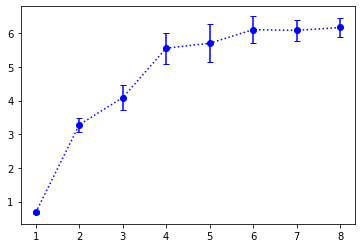

In [45]:
mean_pi = np.mean(pis_trained_perception_low_inp,axis=0)
std_pi = np.std(pis_trained_perception_low_inp,axis=0)

plt.errorbar(ds, mean_pi, yerr=std_pi, capsize=3,fmt='bo:')

### Input=.8

**Simulating Dynamics**

In [46]:
time=10000

def rule_input(time):
    return .8 + np.random.normal(0, .05)
def bias(time):
    return 1
def noise(time):
    return np.sqrt(2 * time_constant/timestep) * noise_strength * np.random.normal(0, 1)
perception_activations = []
for i, network in enumerate(perception_networks):
    network.reset_activations()
    input_funcs = [bias, noise, rule_input]
    inputs = network.convert(time, input_funcs)
    outputs, activations = network.simulate(time, inputs, input_weights_perception[i])
    activations = [activation.numpy() for activation in activations]
    activations = np.asarray(activations)
    perception_activations.append(activations)

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 686.75it/s]


**Running DCA**

In [47]:
max_dim = 8
ds = np.arange(1, max_dim+1)

In [48]:
pis_trained_perception_high_inp=[]
for activations in perception_activations:
    X = activations
    pi = np.zeros(ds.size) #Predictive Information
    dca_scores = np.zeros(ds.size)
    dca_model = DCA(T=10, d=256)
    dca_model.estimate_data_statistics(X) # only need to estimate this once
    for ii, d in tqdm(enumerate(ds)):
        dca_model.fit_projection(d=d)
        pi[ii] = dca_model.score()
    pis_trained_perception_high_inp.append(pi)

8it [02:03, 15.41s/it]
8it [02:56, 22.08s/it]
8it [02:48, 21.07s/it]
8it [01:44, 13.10s/it]
8it [02:21, 17.74s/it]
8it [02:51, 21.39s/it]
8it [02:33, 19.18s/it]
8it [02:29, 18.67s/it]
8it [02:55, 21.94s/it]
8it [02:22, 17.79s/it]


**Plotting PI Curve**

<ErrorbarContainer object of 3 artists>

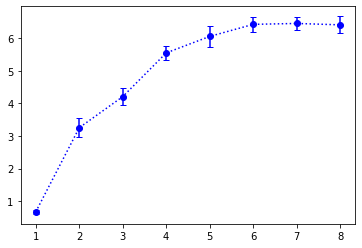

In [49]:
mean_pi = np.mean(pis_trained_perception_high_inp,axis=0)
std_pi = np.std(pis_trained_perception_high_inp,axis=0)

plt.errorbar(ds, mean_pi, yerr=std_pi, capsize=3,fmt='bo:')

## Combined Plot

Text(0.5, 0, 'Subspace Dimensionality')

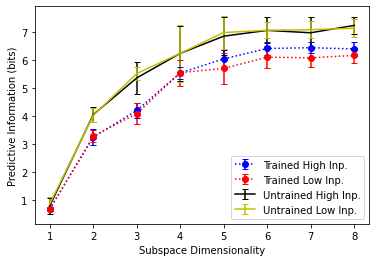

In [50]:
mean_pi_trained_perception_high_inp = np.mean(pis_trained_perception_high_inp,axis=0)
std_pi_trained_perception_high_inp = np.std(pis_trained_perception_high_inp,axis=0)

mean_pi_trained_perception_low_inp = np.mean(pis_trained_perception_low_inp,axis=0)
std_pi_trained_perception_low_inp = np.std(pis_trained_perception_low_inp,axis=0)

mean_pi_untrained_perception_high_inp = np.mean(pis_untrained_perception_high_inp,axis=0)
std_pi_untrained_perception_high_inp = np.std(pis_untrained_perception_high_inp,axis=0)

mean_pi_untrained_perception_low_inp = np.mean(pis_untrained_perception_low_inp,axis=0)
std_pi_untrained_perception_low_inp = np.std(pis_untrained_perception_low_inp,axis=0)

plt.errorbar(ds, mean_pi_trained_perception_high_inp, yerr = std_pi_trained_perception_high_inp, capsize=3,fmt='bo:', label='Trained High Inp.')
plt.errorbar(ds, mean_pi_trained_perception_low_inp, yerr = std_pi_trained_perception_low_inp, capsize=3,fmt='ro:', label='Trained Low Inp.')
plt.errorbar(ds, mean_pi_untrained_perception_high_inp, yerr = std_pi_untrained_perception_high_inp, capsize=3,fmt='k-', label='Untrained High Inp.')
plt.errorbar(ds, mean_pi_untrained_perception_low_inp, yerr = std_pi_untrained_perception_low_inp, capsize=3,fmt='y-', label='Untrained Low Inp.')
plt.legend()
plt.ylabel('Predictive Information (bits)')
plt.xlabel('Subspace Dimensionality')

## Decision Task

In [51]:
val1=0.8
val2=1.2

### Untrained Network, Input1>Input2

**Simulating Dynamics**

In [52]:
time=10000

def input1(time):
    return val2 + np.random.normal(0, .05)
def input2(time):
    return val1 + np.random.normal(0, .05)
def bias(time):
    return 1
def noise(time):
    return np.sqrt(2 * time_constant/timestep) * noise_strength * np.random.normal(0, 1)
untrained_decision_activations = []
for i, network in enumerate(decision_networks_untrained):
    network.reset_activations()
    input_funcs = [bias, noise, input1, input2]
    inputs = network.convert(time, input_funcs)
    outputs, activations = network.simulate(time, inputs, input_weights_decision[i])
    activations = [activation.numpy() for activation in activations]
    activations = np.asarray(activations)
    untrained_decision_activations.append(activations)

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 701.17it/s]


**Running DCA**

In [53]:
max_dim = 8
ds = np.arange(1, max_dim+1)

In [54]:
pis_untrained_decision_inp1=[]
for activations in untrained_decision_activations:
    X = activations
    pi = np.zeros(ds.size) #Predictive Information
    dca_scores = np.zeros(ds.size)
    dca_model = DCA(T=10, d=256)
    dca_model.estimate_data_statistics(X) # only need to estimate this once
    for ii, d in tqdm(enumerate(ds)):
        dca_model.fit_projection(d=d)
        pi[ii] = dca_model.score()
    pis_untrained_decision_inp1.append(pi)

8it [01:18,  9.79s/it]
8it [01:30, 11.34s/it]
8it [01:56, 14.52s/it]
8it [01:37, 12.14s/it]
8it [01:19,  9.90s/it]
8it [01:29, 11.20s/it]
8it [01:40, 12.50s/it]
8it [01:09,  8.70s/it]
8it [01:19, 10.00s/it]
8it [01:27, 10.98s/it]


**Plotting PI Curve**

<ErrorbarContainer object of 3 artists>

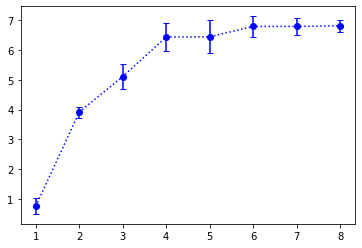

In [55]:
mean_pi = np.mean(pis_untrained_decision_inp1,axis=0)
std_pi = np.std(pis_untrained_decision_inp1,axis=0)

plt.errorbar(ds, mean_pi, yerr=std_pi, capsize=3,fmt='bo:')

### Untrained Network, Input2>Input1

**Simulating Dynamics**

In [56]:
time=10000

def input1(time):
    return val1 + np.random.normal(0, .05)
def input2(time):
    return val2 + np.random.normal(0, .05)
def bias(time):
    return 1
def noise(time):
    return np.sqrt(2 * time_constant/timestep) * noise_strength * np.random.normal(0, 1)
untrained_decision_activations = []
for i, network in enumerate(decision_networks_untrained):
    network.reset_activations()
    input_funcs = [bias, noise, input1, input2]
    inputs = network.convert(time, input_funcs)
    outputs, activations = network.simulate(time, inputs, input_weights_decision[i])
    activations = [activation.numpy() for activation in activations]
    activations = np.asarray(activations)
    untrained_decision_activations.append(activations)

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 703.62it/s]


**Running DCA**

In [57]:
max_dim = 8
ds = np.arange(1, max_dim+1)

In [58]:
pis_untrained_decision_inp2=[]
for activations in untrained_decision_activations:
    X = activations
    pi = np.zeros(ds.size) #Predictive Information
    dca_scores = np.zeros(ds.size)
    dca_model = DCA(T=10, d=256)
    dca_model.estimate_data_statistics(X) # only need to estimate this once
    for ii, d in tqdm(enumerate(ds)):
        dca_model.fit_projection(d=d)
        pi[ii] = dca_model.score()
    pis_untrained_decision_inp2.append(pi)

8it [01:43, 12.97s/it]
8it [02:18, 17.26s/it]
8it [01:31, 11.46s/it]
8it [01:50, 13.84s/it]
8it [01:29, 11.20s/it]
8it [01:29, 11.22s/it]
8it [01:51, 13.89s/it]
8it [01:47, 13.45s/it]
8it [01:40, 12.50s/it]
8it [01:45, 13.16s/it]


**Plotting PI Curve**

<ErrorbarContainer object of 3 artists>

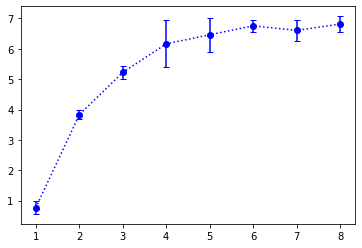

In [59]:
mean_pi = np.mean(pis_untrained_decision_inp2,axis=0)
std_pi = np.std(pis_untrained_decision_inp2,axis=0)

plt.errorbar(ds, mean_pi, yerr=std_pi, capsize=3,fmt='bo:')

### Input1>Input2

**Simulating Dynamics**

In [60]:
time=10000

def input1(time):
    return val2 + np.random.normal(0, .05)
def input2(time):
    return val1 + np.random.normal(0, .05)
def bias(time):
    return 1
def noise(time):
    return np.sqrt(2 * time_constant/timestep) * noise_strength * np.random.normal(0, 1)
trained_decision_activations = []
for i, network in enumerate(decision_networks):
    network.reset_activations()
    input_funcs = [bias, noise, input1, input2]
    inputs = network.convert(time, input_funcs)
    outputs, activations = network.simulate(time, inputs, input_weights_decision[i])
    activations = [activation.numpy() for activation in activations]
    activations = np.asarray(activations)
    trained_decision_activations.append(activations)

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 608.77it/s]


**Running DCA**

In [61]:
max_dim = 8
ds = np.arange(1, max_dim+1)

In [62]:
pis_trained_decision_inp1=[]
for activations in trained_decision_activations:
    X = activations
    pi = np.zeros(ds.size) #Predictive Information
    dca_scores = np.zeros(ds.size)
    dca_model = DCA(T=10, d=256)
    dca_model.estimate_data_statistics(X) # only need to estimate this once
    for ii, d in tqdm(enumerate(ds)):
        dca_model.fit_projection(d=d)
        pi[ii] = dca_model.score()
    pis_trained_decision_inp1.append(pi)

8it [02:02, 15.26s/it]
8it [02:51, 21.40s/it]
8it [01:49, 13.68s/it]
8it [02:04, 15.55s/it]
8it [02:15, 16.94s/it]
8it [01:57, 14.72s/it]
8it [02:02, 15.31s/it]
8it [01:47, 13.44s/it]
8it [02:49, 21.16s/it]
8it [02:44, 20.60s/it]


**Plotting PI Curve**

<ErrorbarContainer object of 3 artists>

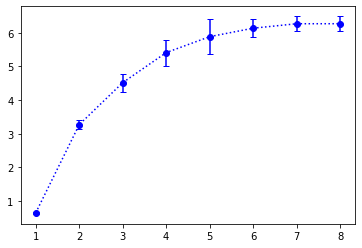

In [63]:
mean_pi = np.mean(pis_trained_decision_inp1,axis=0)
std_pi = np.std(pis_trained_decision_inp1,axis=0)

plt.errorbar(ds, mean_pi, yerr=std_pi, capsize=3,fmt='bo:')

### Input2>Input1

**Simulating Dynamics**

In [64]:
time=10000

def input1(time):
    return val1 + np.random.normal(0, .05)
def input2(time):
    return val2 + np.random.normal(0, .05)
def bias(time):
    return 1
def noise(time):
    return np.sqrt(2 * time_constant/timestep) * noise_strength * np.random.normal(0, 1)
trained_decision_activations = []
for i, network in enumerate(decision_networks):
    network.reset_activations()
    input_funcs = [bias, noise, input1, input2]
    inputs = network.convert(time, input_funcs)
    outputs, activations = network.simulate(time, inputs, input_weights_decision[i])
    activations = [activation.numpy() for activation in activations]
    activations = np.asarray(activations)
    trained_decision_activations.append(activations)

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 548.49it/s]


**Running DCA**

In [65]:
max_dim = 8
ds = np.arange(1, max_dim+1)

In [66]:
pis_trained_decision_inp2=[]
for activations in trained_decision_activations:
    X = activations
    pi = np.zeros(ds.size) #Predictive Information
    dca_scores = np.zeros(ds.size)
    dca_model = DCA(T=10, d=256)
    dca_model.estimate_data_statistics(X) # only need to estimate this once
    for ii, d in tqdm(enumerate(ds)):
        dca_model.fit_projection(d=d)
        pi[ii] = dca_model.score()
    pis_trained_decision_inp2.append(pi)

8it [02:05, 15.66s/it]
8it [02:41, 20.20s/it]
8it [01:45, 13.18s/it]
8it [01:38, 12.30s/it]
8it [01:28, 11.03s/it]
8it [02:23, 17.96s/it]
8it [00:54,  6.81s/it]
8it [01:16,  9.61s/it]
8it [01:52, 14.07s/it]
8it [02:08, 16.10s/it]


**Plotting PI Curve**

<ErrorbarContainer object of 3 artists>

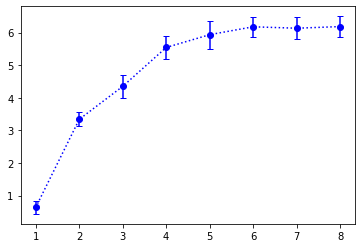

In [67]:
mean_pi = np.mean(pis_trained_decision_inp2,axis=0)
std_pi = np.std(pis_trained_decision_inp2,axis=0)

plt.errorbar(ds, mean_pi, yerr=std_pi, capsize=3,fmt='bo:')

## Combined Plots

Text(0.5, 0, 'Subspace Dimensionality')

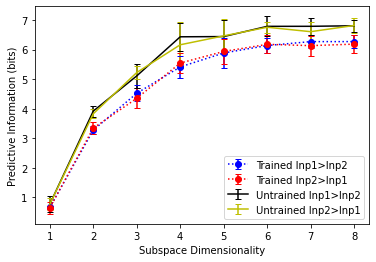

In [68]:
mean_pi_trained_decision_inp1 = np.mean(pis_trained_decision_inp1,axis=0)
std_pi_trained_decision_inp1 = np.std(pis_trained_decision_inp1,axis=0)

mean_pi_trained_decision_inp2 = np.mean(pis_trained_decision_inp2,axis=0)
std_pi_trained_decision_inp2 = np.std(pis_trained_decision_inp2,axis=0)

mean_pi_untrained_decision_inp1 = np.mean(pis_untrained_decision_inp1,axis=0)
std_pi_untrained_decision_inp1 = np.std(pis_untrained_decision_inp1,axis=0)

mean_pi_untrained_decision_inp2 = np.mean(pis_untrained_decision_inp2,axis=0)
std_pi_untrained_decision_inp2 = np.std(pis_untrained_decision_inp2,axis=0)

plt.errorbar(ds, mean_pi_trained_decision_inp1, yerr = std_pi_trained_decision_inp1, capsize=3,fmt='bo:', label='Trained Inp1>Inp2')
plt.errorbar(ds, mean_pi_trained_decision_inp2, yerr = std_pi_trained_decision_inp2, capsize=3,fmt='ro:', label='Trained Inp2>Inp1')
plt.errorbar(ds, mean_pi_untrained_decision_inp1, yerr = std_pi_untrained_decision_inp1, capsize=3,fmt='k-', label='Untrained Inp1>Inp2')
plt.errorbar(ds, mean_pi_untrained_decision_inp2, yerr = std_pi_untrained_decision_inp2, capsize=3,fmt='y-', label='Untrained Inp2>Inp1')
plt.legend()
plt.ylabel('Predictive Information (bits)')
plt.xlabel('Subspace Dimensionality')

# Scatter of DCA Loadings and Centrality

Centrality data was already acquired in the weight matrix analysis notebook. This analysis is with no input.

## Perception Networks

### d=2

**Acquiring DCA Loadings (d=2)**

In [86]:
def bias(time):
    return 1
def noise(time):
    return np.sqrt(2 * time_constant/timestep) * noise_strength * np.random.normal(0, 1)
d=2
dca_loadings = []
for network in tqdm(perception_networks):
    network.reset_activations()
    input_funcs = [bias, noise]
    inputs = network.convert(time, input_funcs)
    outputs, activations = network.simulate(time, inputs, input_weights_perception[i][:2], disable_progress_bar=True)
    activations = [activation.numpy() for activation in activations]
    activations = np.asarray(activations)
    dca_model = DCA(T=10, d=256)
    dca_model.estimate_data_statistics(activations)
    dca_model.fit_projection(d=d)
    mat = dca_model.coef_
    loadings = np.linalg.norm(mat, axis=1).tolist()
    dca_loadings += loadings

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [05:53<00:00, 35.35s/it]


In [87]:
dca_loadings = np.asarray(dca_loadings)
centrality_coeffs = np.load('centrality_coeffs_final_perception.npy')

Values for network 0-8, network 9 is an outlier

Text(0, 0.5, 'Centrality Coefficient')

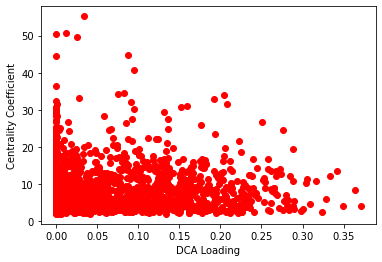

In [96]:
plt.errorbar(dca_loadings[:9*num_nodes], centrality_coeffs[:9*num_nodes],fmt='ro')
plt.xlabel('DCA Loading')
plt.ylabel('Centrality Coefficient')

**Plot for a single network**

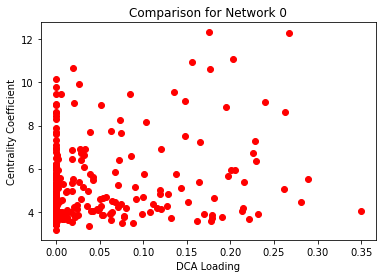

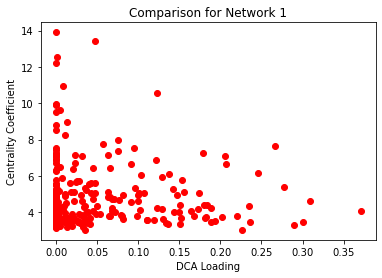

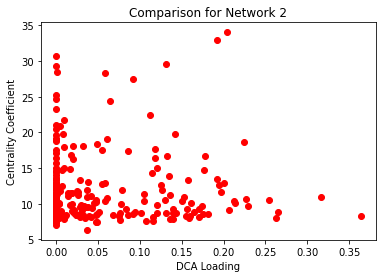

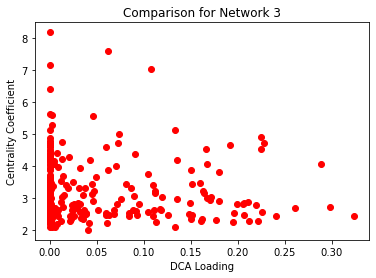

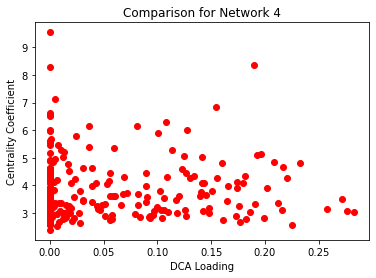

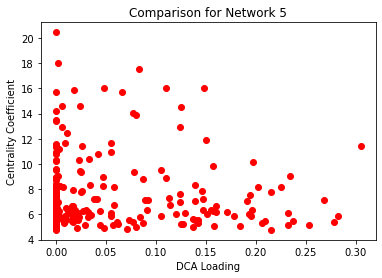

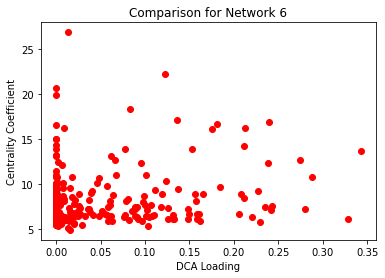

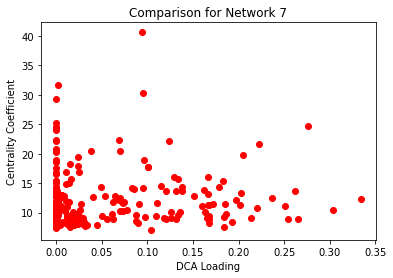

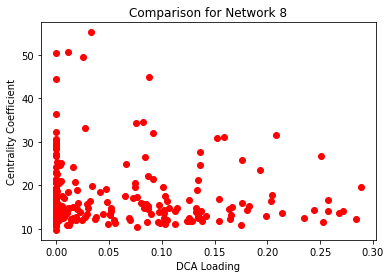

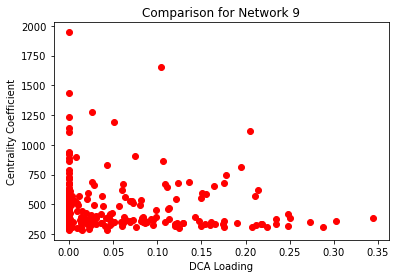

In [95]:
for network_num in range(10):
    plt.errorbar(dca_loadings[network_num*num_nodes:(network_num+1)*num_nodes], centrality_coeffs[network_num*num_nodes:(network_num+1)*num_nodes],fmt='ro')
    plt.xlabel('DCA Loading')
    plt.ylabel('Centrality Coefficient')
    plt.title('Comparison for Network {0}'.format(network_num))
    plt.show()

### d=8

In [97]:
def bias(time):
    return 1
def noise(time):
    return np.sqrt(2 * time_constant/timestep) * noise_strength * np.random.normal(0, 1)
d=8
dca_loadings = []
for network in tqdm(perception_networks):
    network.reset_activations()
    input_funcs = [bias, noise]
    inputs = network.convert(time, input_funcs)
    outputs, activations = network.simulate(time, inputs, input_weights_perception[i][:2], disable_progress_bar=True)
    activations = [activation.numpy() for activation in activations]
    activations = np.asarray(activations)
    dca_model = DCA(T=10, d=256)
    dca_model.estimate_data_statistics(activations)
    dca_model.fit_projection(d=d)
    mat = dca_model.coef_
    loadings = np.linalg.norm(mat, axis=1).tolist()
    dca_loadings += loadings

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [08:22<00:00, 50.21s/it]


Text(0, 0.5, 'Centrality Coefficient')

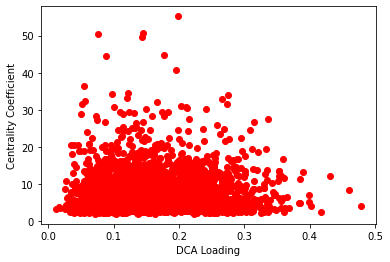

In [100]:
plt.errorbar(dca_loadings[:9*num_nodes], centrality_coeffs[:9*num_nodes],fmt='ro')
plt.xlabel('DCA Loading')
plt.ylabel('Centrality Coefficient')

**Plot for a single network**

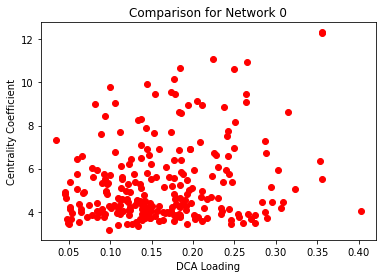

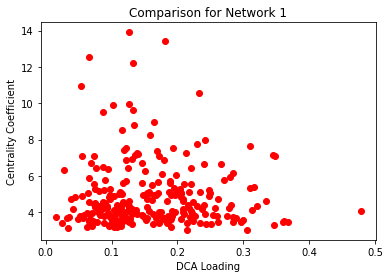

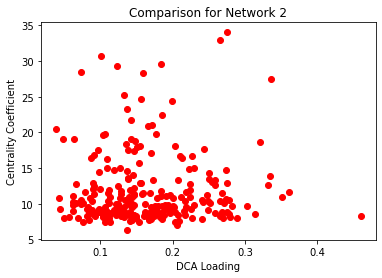

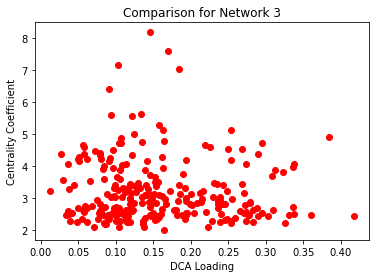

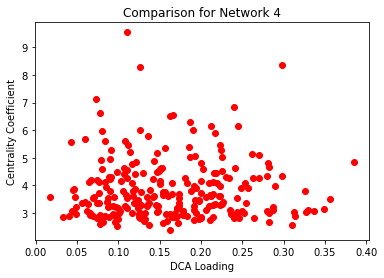

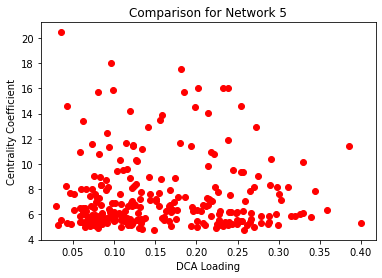

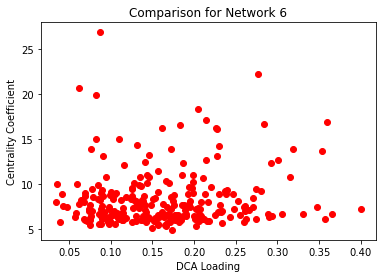

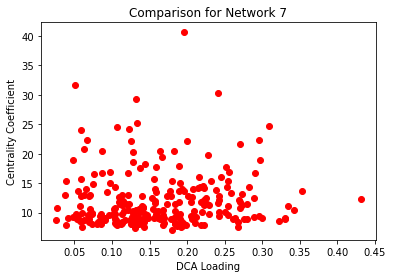

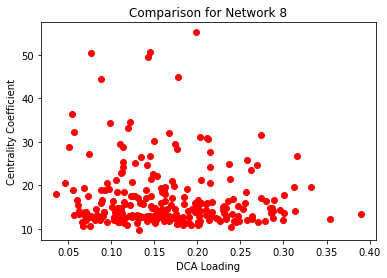

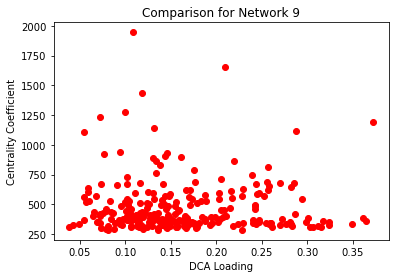

In [99]:
for network_num in range(10):
    plt.errorbar(dca_loadings[network_num*num_nodes:(network_num+1)*num_nodes], centrality_coeffs[network_num*num_nodes:(network_num+1)*num_nodes],fmt='ro')
    plt.xlabel('DCA Loading')
    plt.ylabel('Centrality Coefficient')
    plt.title('Comparison for Network {0}'.format(network_num))
    plt.show()

## Decision Networks

### d=2

**Acquiring DCA Loadings**

In [101]:
def bias(time):
    return 1
def noise(time):
    return np.sqrt(2 * time_constant/timestep) * noise_strength * np.random.normal(0, 1)
d=2
dca_loadings = []
for network in tqdm(decision_networks):
    network.reset_activations()
    input_funcs = [bias, noise]
    inputs = network.convert(time, input_funcs)
    outputs, activations = network.simulate(time, inputs, input_weights_decision[i][:2], disable_progress_bar=True)
    activations = [activation.numpy() for activation in activations]
    activations = np.asarray(activations)
    dca_model = DCA(T=10, d=256)
    dca_model.estimate_data_statistics(activations)
    dca_model.fit_projection(d=d)
    mat = dca_model.coef_
    loadings = np.linalg.norm(mat, axis=1).tolist()
    dca_loadings += loadings

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [06:03<00:00, 36.36s/it]


In [102]:
dca_loadings = np.asarray(dca_loadings)
centrality_coeffs = np.load('centrality_coeffs_final_decision.npy')

Text(0, 0.5, 'Centrality Coefficient')

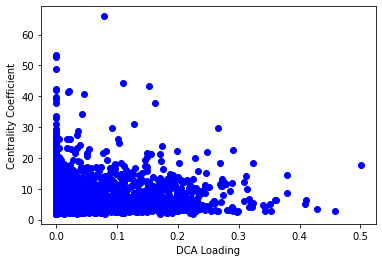

In [103]:
plt.errorbar(dca_loadings, centrality_coeffs,fmt='bo')
plt.xlabel('DCA Loading')
plt.ylabel('Centrality Coefficient')

**Plot for a single network**

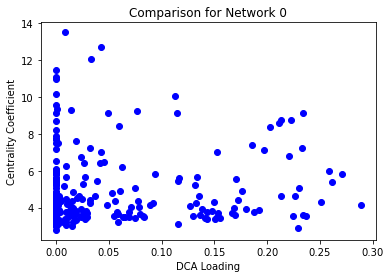

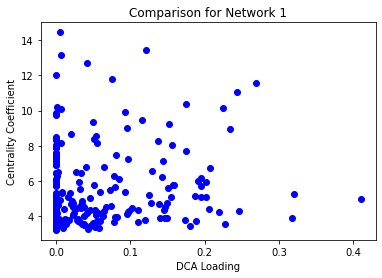

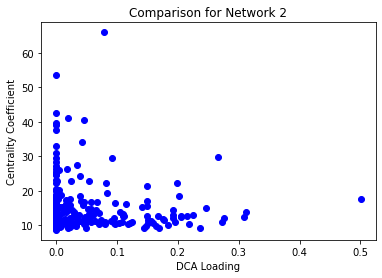

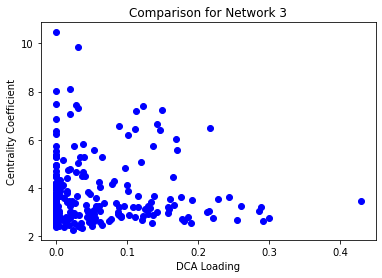

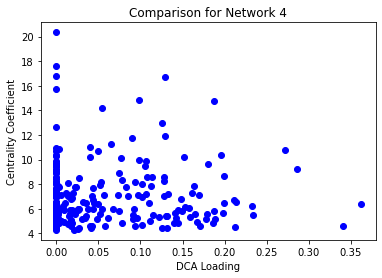

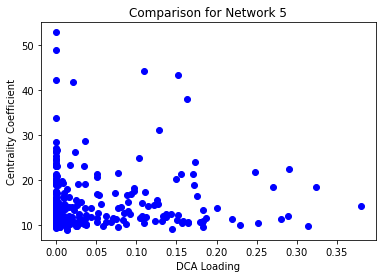

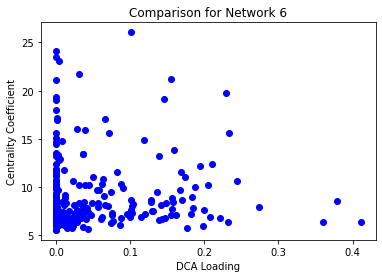

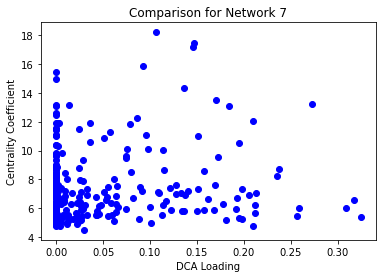

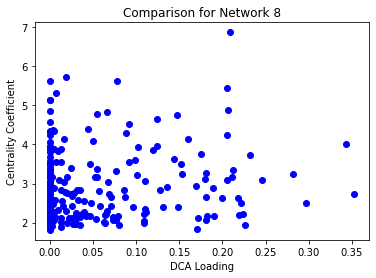

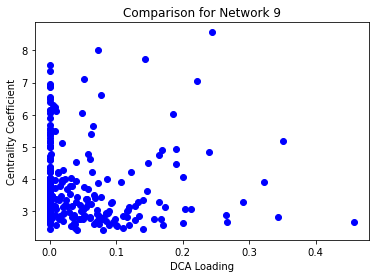

In [104]:
for network_num in range(10):
    plt.errorbar(dca_loadings[network_num*num_nodes:(network_num+1)*num_nodes], centrality_coeffs[network_num*num_nodes:(network_num+1)*num_nodes],fmt='bo')
    plt.xlabel('DCA Loading')
    plt.ylabel('Centrality Coefficient')
    plt.title('Comparison for Network {0}'.format(network_num))
    plt.show()

### d=8

**Acquiring DCA Loadings**

In [105]:
def bias(time):
    return 1
def noise(time):
    return np.sqrt(2 * time_constant/timestep) * noise_strength * np.random.normal(0, 1)
d=8
dca_loadings = []
for network in tqdm(decision_networks):
    network.reset_activations()
    input_funcs = [bias, noise]
    inputs = network.convert(time, input_funcs)
    outputs, activations = network.simulate(time, inputs, input_weights_decision[i][:2], disable_progress_bar=True)
    activations = [activation.numpy() for activation in activations]
    activations = np.asarray(activations)
    dca_model = DCA(T=10, d=256)
    dca_model.estimate_data_statistics(activations)
    dca_model.fit_projection(d=d)
    mat = dca_model.coef_
    loadings = np.linalg.norm(mat, axis=1).tolist()
    dca_loadings += loadings

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [08:40<00:00, 52.07s/it]


In [106]:
dca_loadings = np.asarray(dca_loadings)
centrality_coeffs = np.load('centrality_coeffs_final_decision.npy')

Text(0, 0.5, 'Centrality Coefficient')

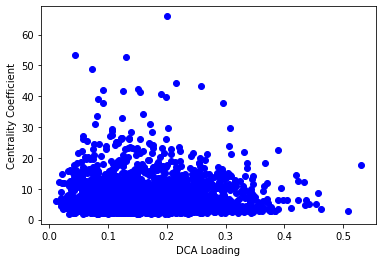

In [107]:
plt.errorbar(dca_loadings, centrality_coeffs,fmt='bo')
plt.xlabel('DCA Loading')
plt.ylabel('Centrality Coefficient')

**Plot for a single network**

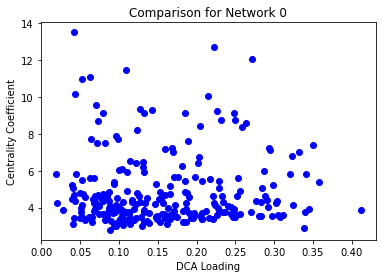

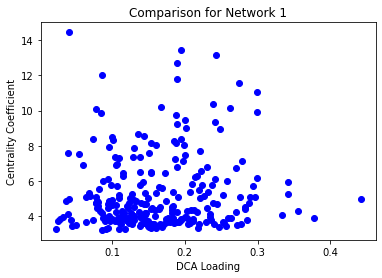

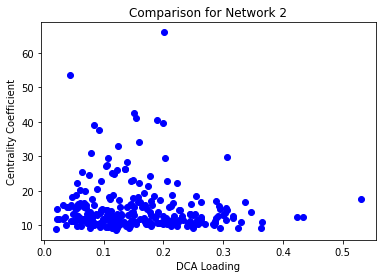

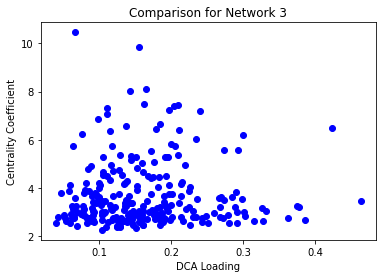

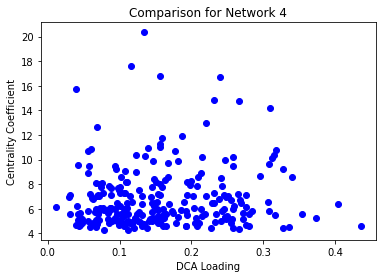

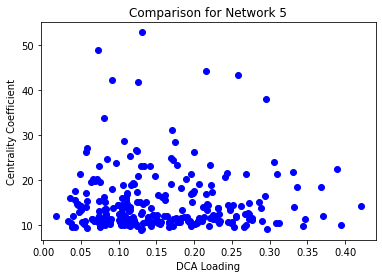

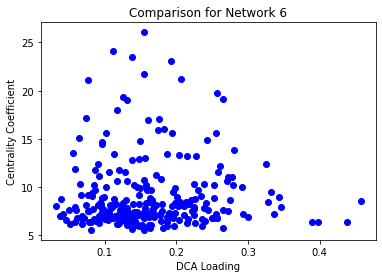

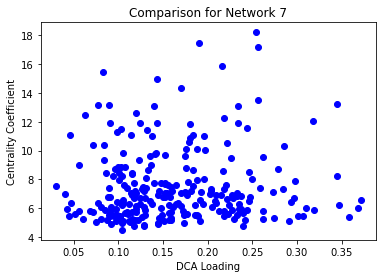

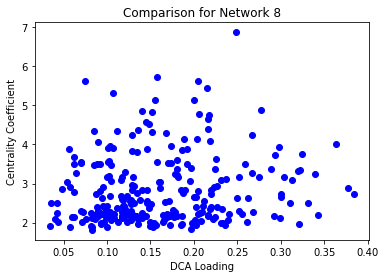

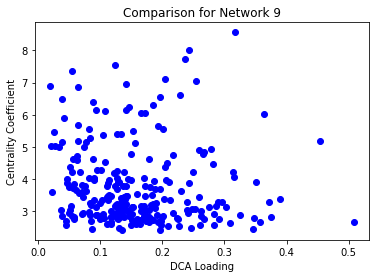

In [108]:
for network_num in range(10):
    plt.errorbar(dca_loadings[network_num*num_nodes:(network_num+1)*num_nodes], centrality_coeffs[network_num*num_nodes:(network_num+1)*num_nodes],fmt='bo')
    plt.xlabel('DCA Loading')
    plt.ylabel('Centrality Coefficient')
    plt.title('Comparison for Network {0}'.format(network_num))
    plt.show()